# **Programming Assignment No.3**

---



## **Logistic Regression**

**Prepared by:**

Amadaor, Kathleen T.

Cabulagan, Karl C.

Ricafrente, John Harold

## **Importing Libraries for Data Preprocessing and Model Evaluationt**

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## **URL of the dataset**

In [ ]:


DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
#Breast Cancer Wisconsin (Original) https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

##**Assigning Column Names to the Dataset**

In [74]:
# Define the column names for the dataset
COLUMN_NAMES = [
    "Sample_code_number",         # ID number
    "Clump_Thickness",            # Clump thickness (1 - 10)
    "Uniformity_of_Cell_Size",    # Uniformity of cell size (1 - 10)
    "Uniformity_of_Cell_Shape",   # Uniformity of cell shape (1 - 10)
    "Marginal_Adhesion",          # Marginal adhesion (1 - 10)
    "Single_Epithelial_Cell_Size",# Size of single epithelial cell (1 - 10)
    "Bare_Nuclei",                # Bare nuclei (1 - 10)
    "Bland_Chromatin",            # Bland chromatin (1 - 10)
    "Normal_Nucleoli",            # Normal nucleoli (1 - 10)
    "Mitoses",                    # Mitoses (1 - 10)
    "Class"                       # Class label (2 for benign, 4 for malignant)
]

# Load the dataset directly from the URL
data = pd.read_csv(DATASET_URL, header=None, names=COLUMN_NAMES)

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())



Dataset Preview:


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## **Data Cleaning and Label Encoding for the Dataset**

In [75]:

# Load the data into a DataFrame
data = pd.read_csv(DATASET_URL, header=None, names=COLUMN_NAMES)

# 1. Remove rows with missing values
data = data.replace('?', pd.NA).dropna()

# 2. Drop the "Sample_code_number" column
data = data.drop(columns=["Sample_code_number"])

# 3. Replace "Class" values: 2 -> 0 (benign), 4 -> 1 (malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

# Display the cleaned dataset preview
print("Cleaned Dataset Preview:")
print(data.head())

Cleaned Dataset Preview:
   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      0  
1                3                2  

## **Correlation Matrix**

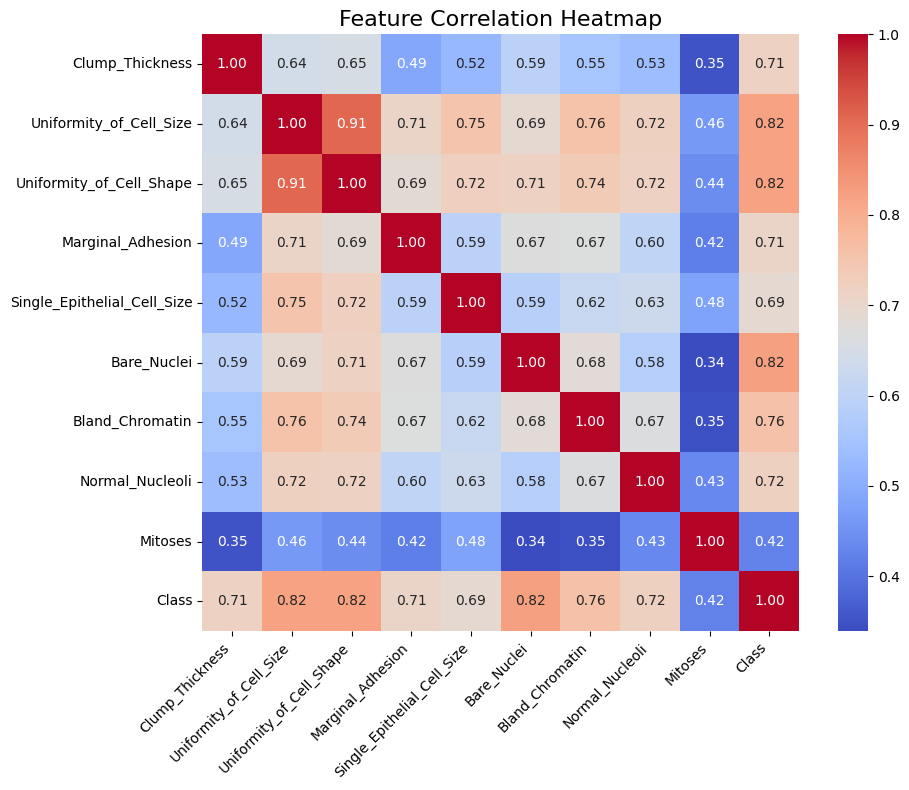

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Add a title
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the heatmap
plt.show()


# **General Guidelines**



---



**1.) Split the samples into 70% Training and 30% Testing at random.**

**2.) Use stratify=y in the test_train_split function. Build a pipeline using the Standard scaler and
logistic regression.**

**3.) Use the default penalty settings of Logistic Regression.**

In [76]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop(columns=["Class"])  # Features
y = data["Class"]  # Target variable (Class)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")



Training data size: 478 samples
Testing data size: 205 samples


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=["Class"])  # Features
y = data["Class"]  # Target variable (Class)

# Split the data into 70% training and 30% testing, while maintaining the class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Feature scaling
    ('logreg', LogisticRegression())         # Step 2: Logistic Regression (default penalty 'l2')
])

# Fit the model using the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)

# Display the results
print("Model Training Completed.")

# Optionally, you can evaluate the model using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Training Completed.
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

Confusion Matrix:
[[128   5]
 [  3  69]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



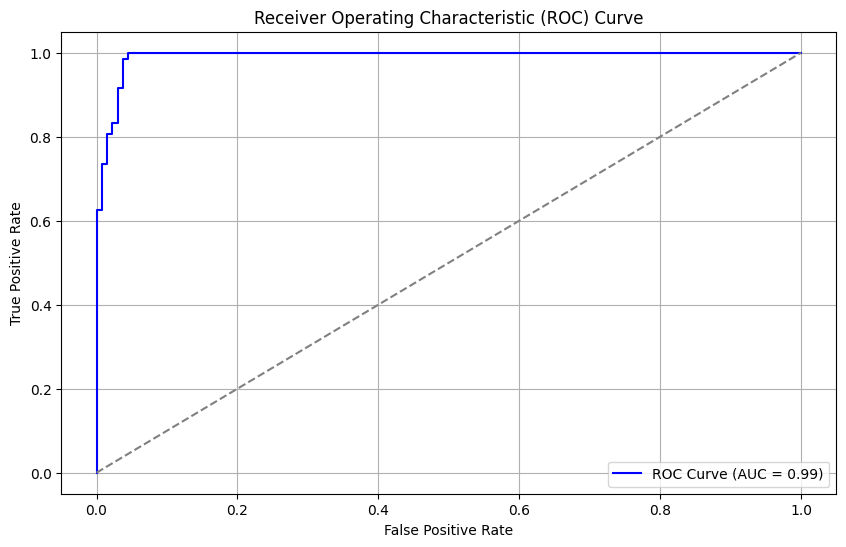

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Fit the model using the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



**4.) After fitting the data, what is the model’s training and testing accuracy? Which features are most
important?**

Training Accuracy: 0.9770
Testing Accuracy: 0.9610

Most Important Features:
                    Feature  Coefficient  Absolute Coefficient
5               Bare_Nuclei     1.849199              1.849199
0           Clump_Thickness     1.198459              1.198459
8                   Mitoses     0.889682              0.889682
2  Uniformity_of_Cell_Shape     0.877177              0.877177
1   Uniformity_of_Cell_Size     0.736751              0.736751


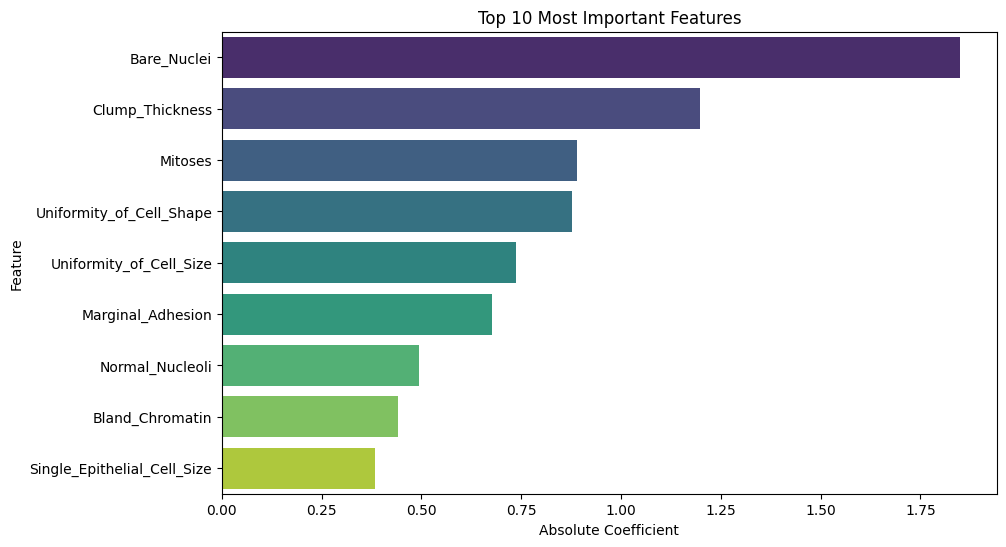

In [88]:
# Get the training and testing accuracy
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Get the logistic regression model from the pipeline
logreg_model = pipeline.named_steps['logreg']

# Extract the coefficients and feature names
coefficients = logreg_model.coef_[0]  # Coefficients for the features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': abs(coefficients)
})

# Sort the features by the absolute value of the coefficients
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 5 most important features
print("\nMost Important Features:")
print(feature_importance_sorted.head())

# Optionally, you can plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance_sorted.head(10), palette='viridis')
plt.title('Top 10 Most Important Features')
plt.show()


**Answer:**
The best Feature in accordance with the importance are:
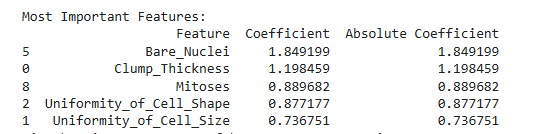


**5.) Generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False
alarm rate.**

Confusion Matrix:
[[128   5]
 [  3  69]]

Precision: 0.9324
Recall: 0.9583
F1 Score: 0.9452
False Alarm Rate: 0.0376


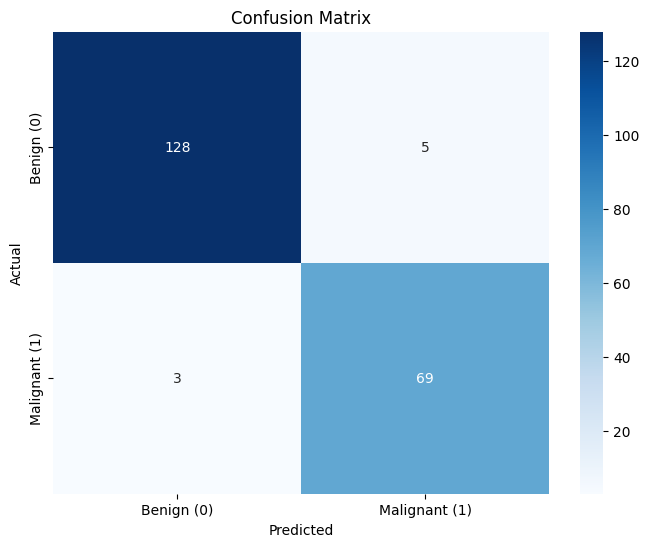

In [82]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate additional metrics
precision = precision_score(y_test, y_pred)  # Precision = TP / (TP + FP)
recall = recall_score(y_test, y_pred)        # Recall = TP / (TP + FN)
f1 = f1_score(y_test, y_pred)                # F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
false_alarm_rate = fp / (fp + tn)            # False Alarm Rate = FP / (FP + TN)

# Print the confusion matrix and metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"False Alarm Rate: {false_alarm_rate:.4f}")

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**6.) Plot the ROC curve and report the AUC. For this item, make a result for both the training and
testing data, separately.**

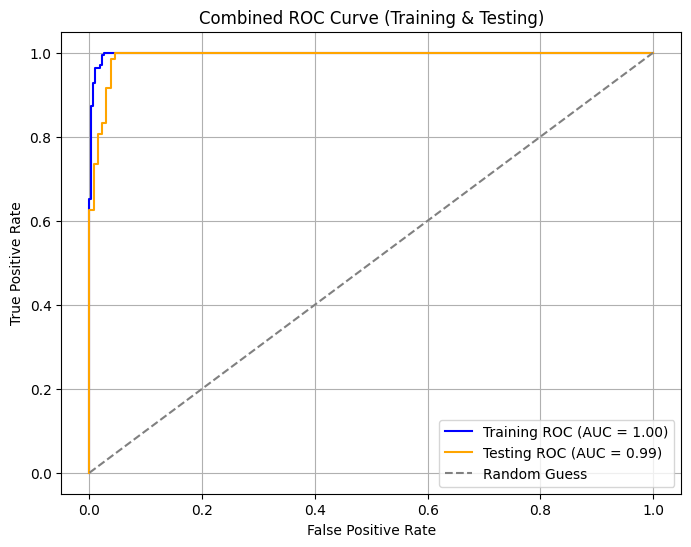

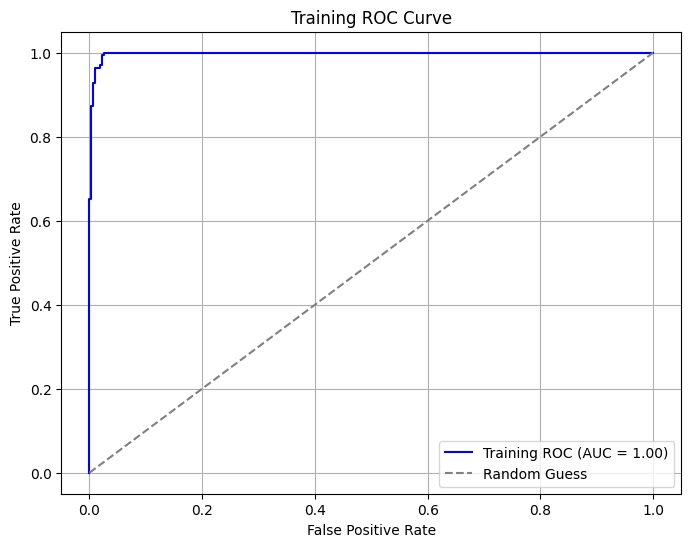

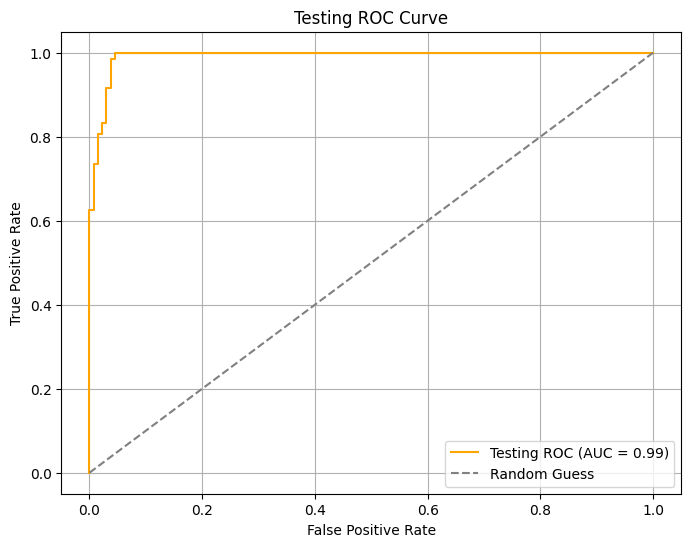

Training AUC: 0.9978
Testing AUC: 0.9918


In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for both training and testing data
y_train_proba = pipeline.predict_proba(X_train)[:, 1]  # Probabilities for the positive class
y_test_proba = pipeline.predict_proba(X_test)[:, 1]    # Probabilities for the positive class

# Calculate ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)

# Calculate ROC curve and AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot Combined ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.2f})', color='orange')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve (Training & Testing)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Training ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Testing ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Testing ROC (AUC = {auc_test:.2f})', color='orange')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC Values
print(f"Training AUC: {auc_train:.4f}")
print(f"Testing AUC: {auc_test:.4f}")



# **Guide Question**


---

##**1. What steps are required to remove the "Sample code number" column?**


> To remove the "Sample_code_number" column from your dataset, you can use the drop() method in pandas

##**2. How can the "Class" values be converted into binary (0 and 1) form in Python?**


> To convert the "Class" values into binary (0 and 1) form in Python, you can use the map() function in Pandas. First, identify the class labels in your dataset (e.g., "M" for malignant and "B" for benign), then map these values to binary equivalents such as {"M": 1, "B": 0}.


##**3. What is the importance of splitting the dataset into training and testing sets?**


> The importance of Splitting the dataset,splitting the data helps to provide an unbiased assessment of the model's performance, preventing overfitting, and ensuring the model generalizes well to new data.


##**4. Why is it necessary to use the stratify parameter in the train_test_split function?**


> The stratify parameter in the train_test_split function is necessary to ensure that the class distribution is preserved in both the training and testing sets.


##**5. What is logistic regression, and why is it suitable for this dataset?**


> It is a statistical model used for binary classification tasks, where the goal is to predict one of two possible outcomes (e.g., 0 or 1, benign or malignant).


## **6. How can the training and testing accuracy of the logistic regression model be calculadte?**


> The training and testing accuracy of a logistic regression model can be calculated using the score() method in scikit-learn, which computes the accuracy by comparing the predicted labels to the actual labels for both the training and testing datasets.


##**7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**


> In logistic regression, the most influential features in determining the tumor status (benign or malignant) can be assessed through the model coefficients. The magnitude of the coefficients indicates the importance of each feature, where larger absolute values suggest a stronger influence on the predicted outcome.


##**8. How is a confusion matrix generated, and what does it represent?**


> A confusion matrix is a performance measurement tool used for classification problems. It summarizes the results of a classifier by comparing the predicted labels to the actual labels, providing insights into the types of errors the model is making. It helps to assess how well the model is performing and where it is getting things right or wrong.


##**9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**
>recision, recall, F1-score, and false alarm rate are performance metrics derived from the confusion matrix. These metrics help assess how well a classification model is performing, especially in terms of handling false positives and false negatives.
True Positive (TP),True Negative (TN),False Positive (FP),False Negative (FN).


##**10. Why are these metrics important for evaluating the performance of a classifier?**


>  Because they provide a deeper understanding of how well the model performs beyond just overall accuracy. precision, recall, F1-score, and false alarm rate help to evaluate a classifier's strengths and weaknesses in specific areas, ensuring that the model’s performance aligns with the specific goals and risks of the task at hand.


##**11. What is an ROC curve, and how is it plotted for a logistic regression model?**


> a graphical representation of a classifier's performance across all possible classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds, showing the trade-off between sensitivity (recall) and specificity (1 - FPR). The ROC curve helps evaluate how well a classifier distinguishes between the two classes (positive and negative) for different decision thresholds


##**12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**


> A metric that quantifies the overall performance of a classification model, specifically for binary classification problems.

>True Positive Rate (TPR): TP=TP/(TP+FN)

>False Positive Rate (FPR): FPR=FP/(FP+TN)

##**13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**


> The comparison of training and testing ROC curves offers valuable insights into the model's ability to generalize, its potential overfitting or underfitting issues, and overall performance. By analyzing these curves and the corresponding AUC values, we can make informed decisions about model tuning, complexity, and selection.


##**14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**


> During Preprocessing and model phases wherein we encounter missing values, and data. Overfitting occurs when the model learns the noise in the training data instead of the underlying pattern, leading to poor generalization to the test set. The best solution is to remove missing values and for the overfiting is to use Cross-Validation


##**15. If the model's performance is not satisfactory, what adjustments could be made to improve it?**


> To improve model's performance we can use tools like:

>-Matplotlib/Seaborn for visualizations.
>-Advanced modeling libraries like XGBoost, LightGBM, and CatBoost can enhance predictions with gradient boosting.
>-hyperparameter optimization, tools like GridSearchCV, RandomizedSearchCV, and Optuna are effective.



